## Decision Tree.
**Decision tree** classifiers are supervised learning models that are useful when we care about interpretability. Think of it like, breaking down the data by making decisions based on multiple questions at each level.

Decision Tree is totally based on Impurity calculation. 
There are several way of impurity calculation like 
* **Entropy calculation**: Entropy is amount of information is needed to accurately describe the some sample. So if sample is homogeneous, means all the element are similar than Entropy is 0, else if sample is equally divided than entropy is maximum 1.
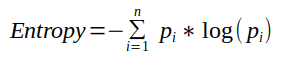
* **Gini index/Gini impurity**: Gini index is measure of inequality in sample. It has value between 0 and 1. Gini index of value 0 means sample are perfectly homogeneous and all element are similar, whereas, Gini index of value 1 means maximal inequality among elements. 
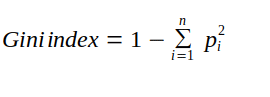

In [1]:
# Import important libraries
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
#Import data file
df = pd.read_csv('C:\\ABC\\NewData.csv')
df.head(10)

,ID,Sensor1,Sensor2,Sensor3,Sensor4,Compound
0,1,7724200,19702100,24094500,239833,Acetone
1,2,7732180,20105200,23921400,239807,Acetone
2,3,7715400,19960900,23898700,239504,Acetone
3,4,7765770,19935600,23244900,239611,Acetone
4,5,7713900,19939200,23230600,239121,Acetone
5,6,7668770,20131300,23661500,238942,Acetone
6,7,7680430,19891200,24438300,239002,Acetone
7,8,7685920,19946200,23650000,238661,Acetone
8,9,7659660,20084000,23766200,238489,Acetone
9,10,7639480,19950700,23848100,238535,Acetone


In [3]:
#Data Overview
df['Compound'].value_counts()

Acetone       1020
Ethanol        781
Xylene         757
Benzene        737
2-propanol     723
Methanol       659
Toluene        651
Name: Compound, dtype: int64

In [4]:
# Removing Unnecessary Column
df.drop("ID", axis=1, inplace = True)

In [5]:
df.shape

(5328, 5)

### Splitting The Data into Training And Testing Dataset for Decision Tree.
The data we use is split into **training data** and **test data**. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.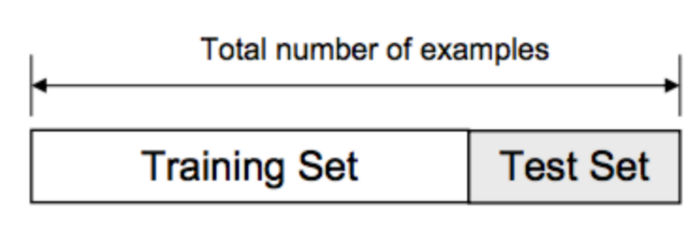

In [6]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(3729, 5)
(1599, 5)


In [7]:
X_train = train[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking the training data features
y_train = train.Compound # output of the training data

X_test = test[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking test data feature
y_test = test.Compound # output value of the test data

In [12]:
# View of Our Training Dataset. 
X_train.head()

,Sensor1,Sensor2,Sensor3,Sensor4
810,4573912,14263431,17461753,203095
2854,4123870,7786100,16829800,201299
2639,4083780,11892600,18685900,220338
2271,4162074,12335200,6344000,318482
2090,4207150,11001700,7470540,319984


In [13]:
# View of Our Testing Dataset.
X_test.head()

,Sensor1,Sensor2,Sensor3,Sensor4
4067,4625190,11135300,5345410,325821
307,4350910,13733300,17238000,216952
2157,4154826,10939000,7423870,312796
1996,4357120,11323600,7884920,326815
1035,6468440,20723300,25158500,417839


In [14]:
y_train.head()

810     Acetone
2854    Ethanol
2639    Ethanol
2271    Benzene
2090    Benzene
Name: Compound, dtype: object

### Fitting Classifier.

In [8]:
# Fitting Classifier to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [10]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.97
Confusion Matrix: 
 [[502   0   0   0   1   0   0]
 [  0 706   0   0   0   0   0]
 [  0   0 479   0   0   0  33]
 [  0   0   0 565   0   0   0]
 [  0   0   0   0 469   0   0]
 [  0   0   0   0   0 403  61]
 [  0   0   0   0   0   3 507]]
              precision    recall  f1-score   support

  2-propanol       1.00      1.00      1.00       503
     Acetone       1.00      1.00      1.00       706
     Benzene       1.00      0.94      0.97       512
     Ethanol       1.00      1.00      1.00       565
    Methanol       1.00      1.00      1.00       469
     Toluene       0.99      0.87      0.93       464
      Xylene       0.84      0.99      0.91       510

    accuracy                           0.97      3729
   macro avg       0.98      0.97      0.97      3729
weighted avg       0.98      0.97      0.97      3729



In [16]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Confusion Matrix: 
 [[217   0   0   0   3   0   0]
 [  0 314   0   0   0   0   0]
 [  0   0 207   0   0   0  18]
 [  0   0   0 216   0   0   0]
 [  0   0   0   0 190   0   0]
 [  0   0   0   0   0 165  22]
 [  0   0   0   0   0   2 245]]
              precision    recall  f1-score   support

  2-propanol       1.00      0.99      0.99       220
     Acetone       1.00      1.00      1.00       314
     Benzene       1.00      0.92      0.96       225
     Ethanol       1.00      1.00      1.00       216
    Methanol       0.98      1.00      0.99       190
     Toluene       0.99      0.88      0.93       187
      Xylene       0.86      0.99      0.92       247

    accuracy                           0.97      1599
   macro avg       0.98      0.97      0.97      1599
weighted avg       0.98      0.97      0.97      1599



### Applying Decision Tree Algorithm.

In [17]:
# importing the necessary packages to use the Decision Tree classification algorithms.
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Decision Tree is:  0.99812382739212


In [18]:
#Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[220,   0,   0,   0,   0,   0,   0],
       [  0, 314,   0,   0,   0,   0,   0],
       [  0,   0, 223,   0,   0,   0,   2],
       [  0,   0,   0, 216,   0,   0,   0],
       [  0,   0,   0,   0, 190,   0,   0],
       [  0,   0,   0,   0,   0, 186,   1],
       [  0,   0,   0,   0,   0,   0, 247]], dtype=int64)

*** Test Accuracy *** 0.99812382739212


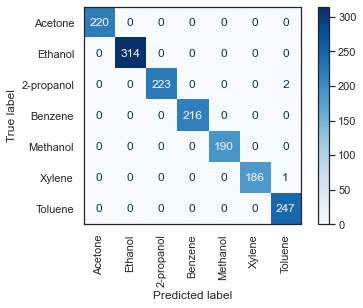

In [19]:
print('*** Test Accuracy ***',model.score(X_test,y_test))
disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Acetone','Ethanol','2-propanol','Benzene','Methanol','Xylene','Toluene'],
                                 xticks_rotation=90,cmap=plt.cm.Blues,
                             values_format='g'
                            )

In [26]:
#Decision Tree Plotting. 
from sklearn import tree
plt.figure(figsize=(300,300))
tree.plot_tree(model);